In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('titanic.csv', sep=',')

In [3]:
data.loc[data['Sex'] == 'male', 'Sex'] = 'Male'
data.loc[data['Sex'] == 'female', 'Sex'] = 'Female'
data['Pclass'] = 'Class ' + data['Pclass'].astype('str')
data.loc[data['Survived'] == 1, 'Survived'] = 'Yes'
data.loc[data['Survived'] == 0, 'Survived'] = 'No'

1. Generate a series of bar charts to describe the gender, ticket class and survival
of the passengers onboard.

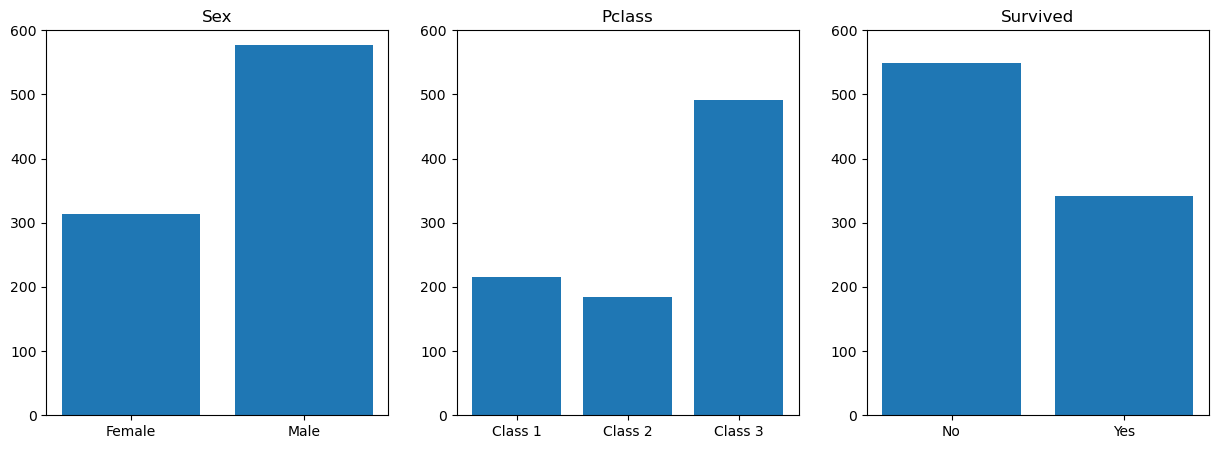

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(15)
for col, ax in zip(['Sex', 'Pclass', 'Survived'], (ax1, ax2, ax3)):
    temp_sers = data[col].value_counts().sort_index()
    ax.bar(temp_sers.index, temp_sers)
    ax.set_title(col)
    ax.set_ylim(0, 600)
plt.show()

2. Generate a histogram for the passengers’ age. Furthermore, describe the
passengers’ age using the following two boxplots: age per ticket class and age
based on survival.

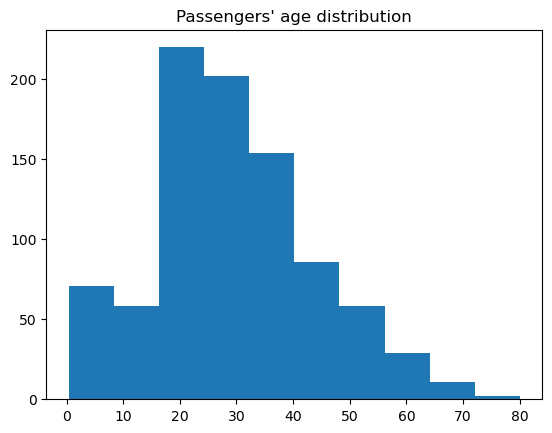

In [5]:
data['Age'] = data['Age'].fillna(method="ffill")
fig, ax = plt.subplots(1, 1)
ax.hist(data['Age'])
ax.set_title("Passengers' age distribution")
plt.show()

Text(0.5, 1.0, 'Age per ticket class')

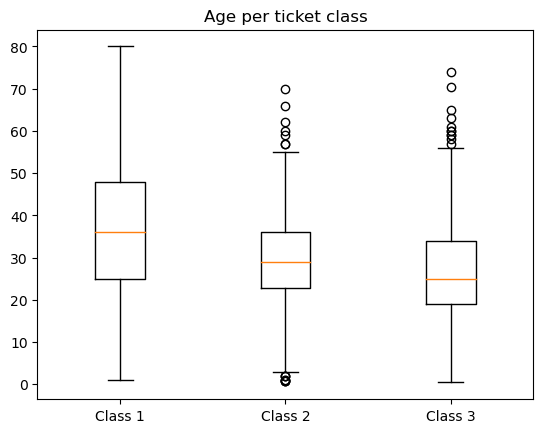

In [6]:
plt.boxplot([data.loc[data['Pclass'] == 'Class 1', 'Age'], 
            data.loc[data['Pclass'] == 'Class 2', 'Age'], data.loc[data['Pclass'] == 'Class 3', 'Age']])
plt.xticks([1, 2, 3], ['Class 1', 'Class 2', 'Class 3'])
plt.title('Age per ticket class')

Text(0.5, 1.0, 'Age based on survival')

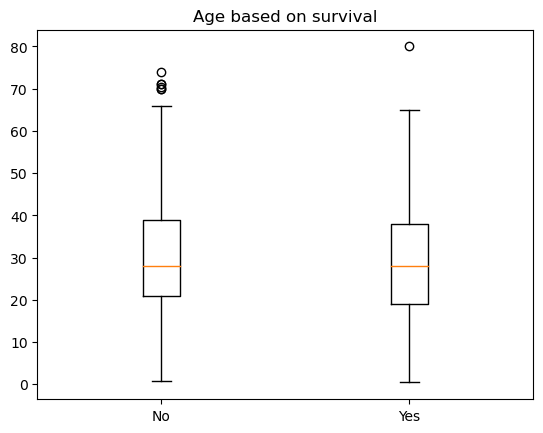

In [7]:
plt.boxplot([data.loc[data['Survived'] == 'No', 'Age'], data.loc[data['Survived'] == 'Yes', 'Age']])
plt.xticks([1, 2], ['No', 'Yes'])
plt.title('Age based on survival')

3. Generate a histogram for the travel fare and a table showing the number of
people who did not pay – you may want to check on Google why a handful of
people was on board for free!

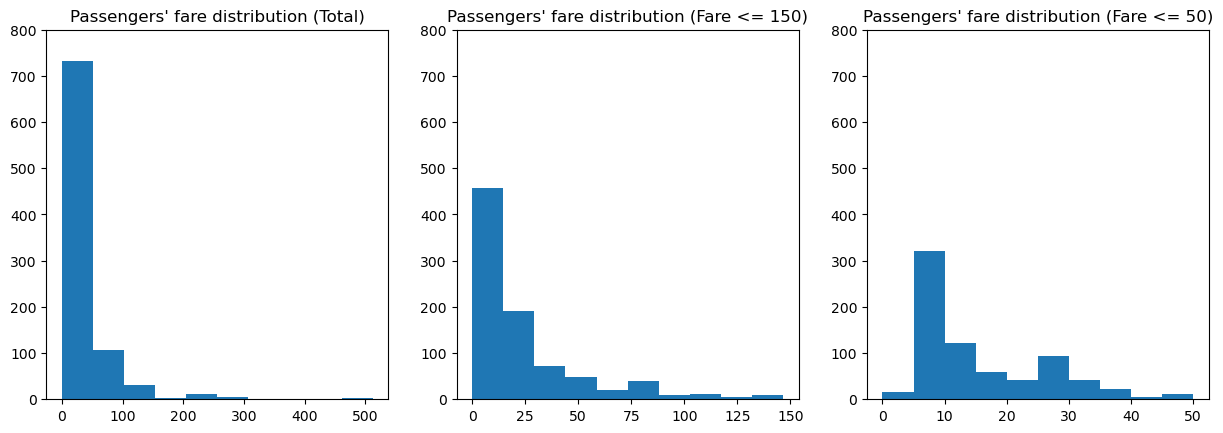

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figwidth(15)
ax1.hist(data['Fare'])
ax1.set_title("Passengers' fare distribution (Total)")
ax2.hist(data.loc[data['Fare'] <= 150, 'Fare'])
ax2.set_title("Passengers' fare distribution (Fare <= 150)")
ax3.hist(data.loc[data['Fare'] <= 50, 'Fare'])
ax3.set_title("Passengers' fare distribution (Fare <= 50)")
for ax in (ax1, ax2, ax3):
    ax.set_ylim(0, 800)
plt.show()

In [9]:
data[data['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,No,Class 3,"Leonard, Mr. Lionel",Male,36.0,0,0,LINE,0.0,NaN,S
263,264,No,Class 1,"Harrison, Mr. William",Male,40.0,0,0,112059,0.0,B94,S
271,272,Yes,Class 3,"Tornquist, Mr. William Henry",Male,25.0,0,0,LINE,0.0,NaN,S
277,278,No,Class 2,"Parkes, Mr. Francis ""Frank""",Male,45.0,0,0,239853,0.0,NaN,S
302,303,No,Class 3,"Johnson, Mr. William Cahoone Jr",Male,19.0,0,0,LINE,0.0,NaN,S
413,414,No,Class 2,"Cunningham, Mr. Alfred Fleming",Male,33.0,0,0,239853,0.0,NaN,S
466,467,No,Class 2,"Campbell, Mr. William",Male,38.0,0,0,239853,0.0,NaN,S
481,482,No,Class 2,"Frost, Mr. Anthony Wood ""Archie""",Male,9.0,0,0,239854,0.0,NaN,S
597,598,No,Class 3,"Johnson, Mr. Alfred",Male,49.0,0,0,LINE,0.0,NaN,S
633,634,No,Class 1,"Parr, Mr. William Henry Marsh",Male,32.0,0,0,112052,0.0,NaN,S


4. A chart of your choice to describe the family size per ticket class 

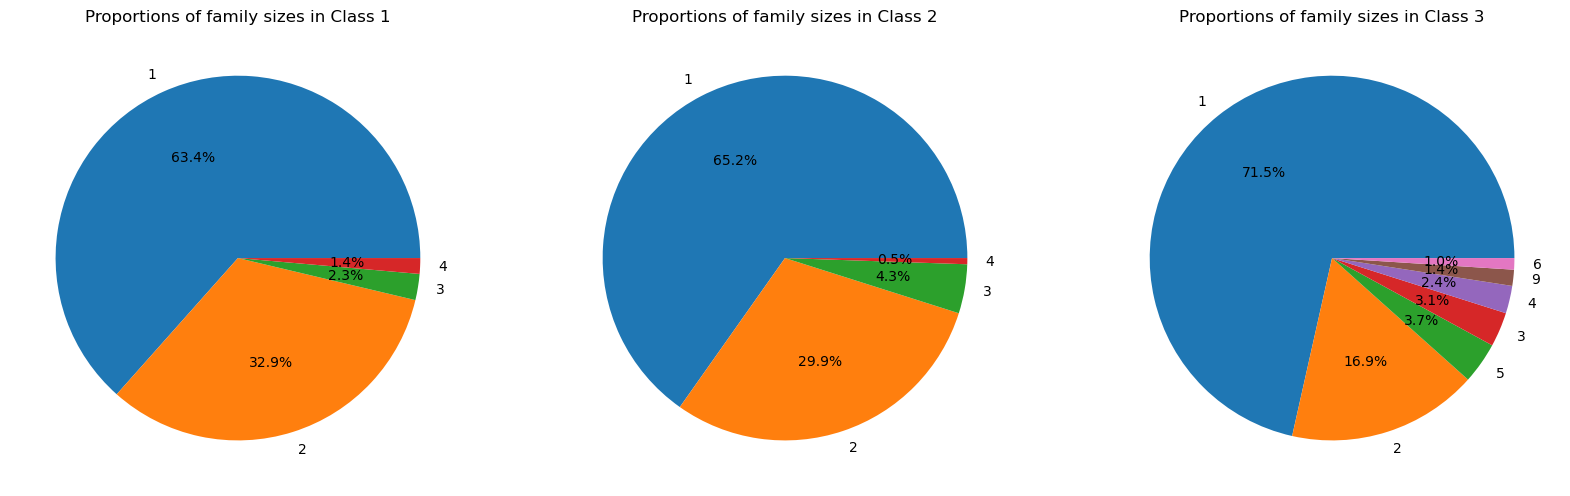

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figheight(15)
fig.set_figwidth(20)
for cl, ax in zip(['Class 1', 'Class 2', 'Class 3'], (ax1, ax2, ax3)):
    temp_sizes = data.loc[data['Pclass'] == cl, 'SibSp'].value_counts()
    ax.pie(temp_sizes, labels=temp_sizes.index + 1, autopct='%1.1f%%')
    ax.set_title("Proportions of family sizes in " + cl)

5. A series of stacked bar charts to show the how survival differs for different
gender and ticket class 

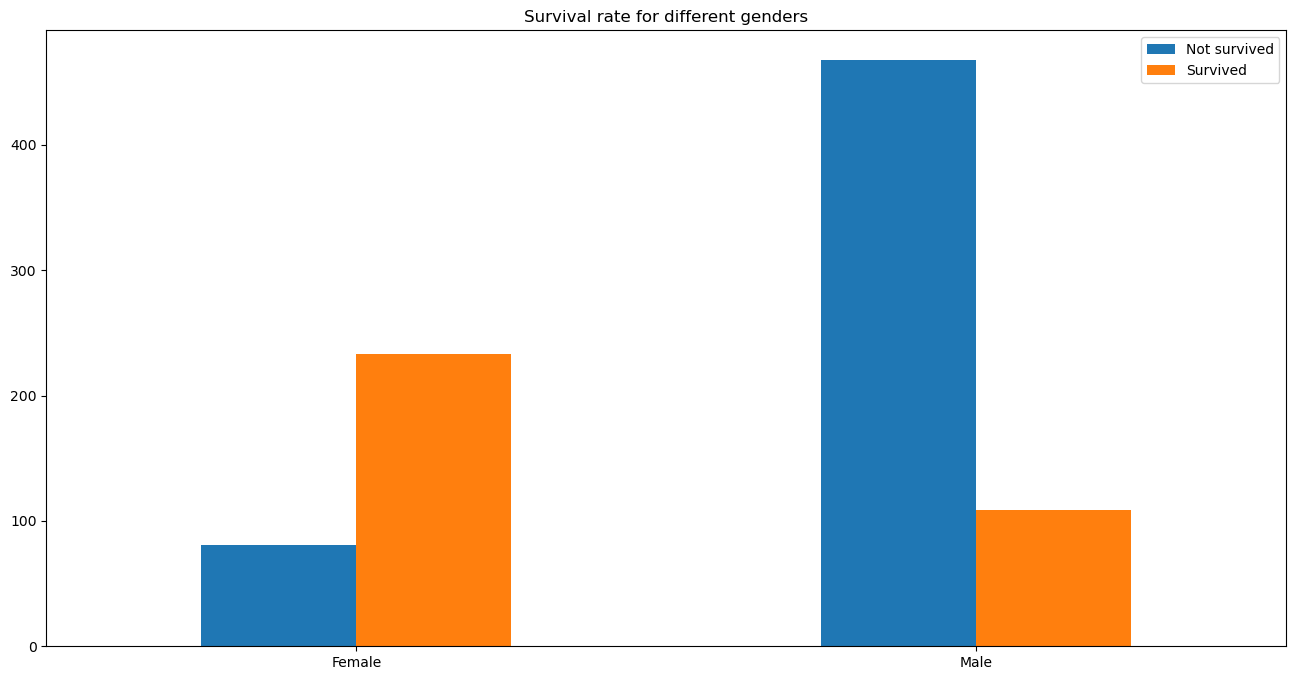

In [11]:
not_survived = data.loc[data['Survived'] == 'No', 'Sex'].value_counts().sort_index()
survived = data.loc[data['Survived'] == 'Yes', 'Sex'].value_counts().sort_index()
df = pd.DataFrame({'Not survived': not_survived, 'Survived': survived}, index=survived.index)
ax = df.plot.bar(rot=0, figsize=(16,8), title='Survival rate for different genders')

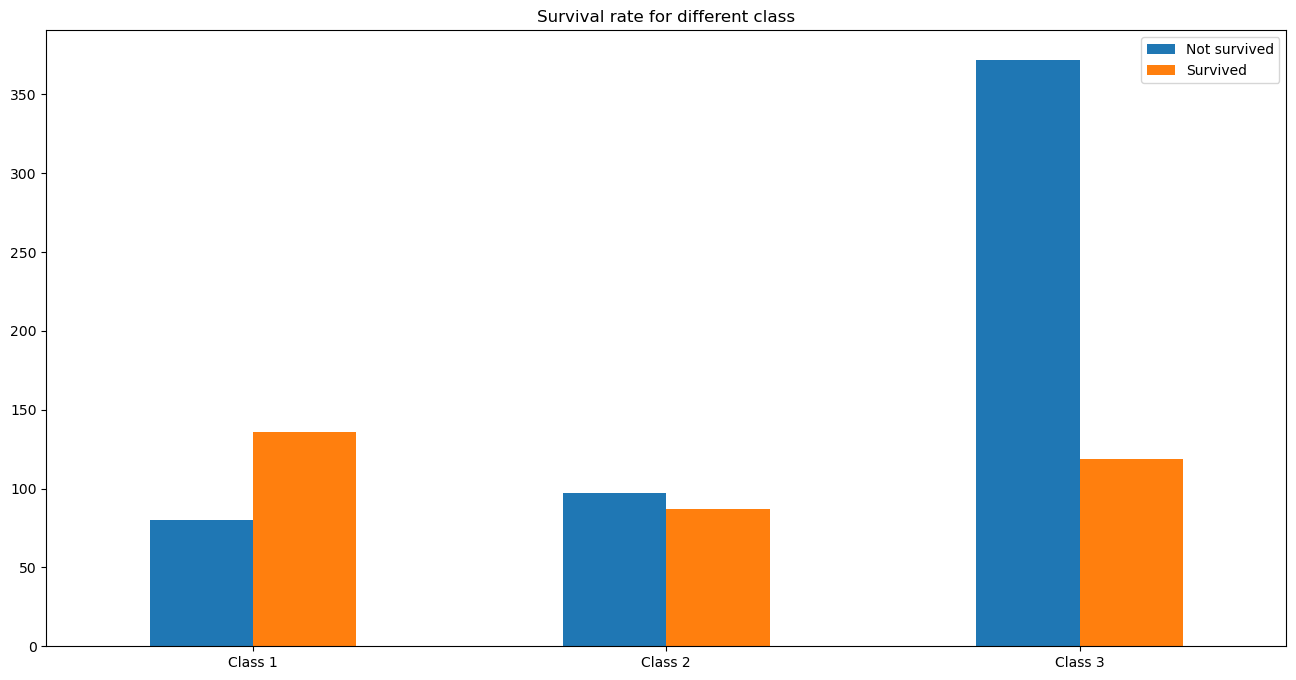

In [12]:
not_survived = data.loc[data['Survived'] == 'No', 'Pclass'].value_counts().sort_index()
survived = data.loc[data['Survived'] == 'Yes', 'Pclass'].value_counts().sort_index()
df = pd.DataFrame({'Not survived': not_survived, 'Survived': survived}, index=survived.index)
ax = df.plot.bar(rot=0, figsize=(16,8), title='Survival rate for different class')

6. A violin chart describing how survival related to age and gender

Text(0.5, 1.0, 'Survival related to age and gender')

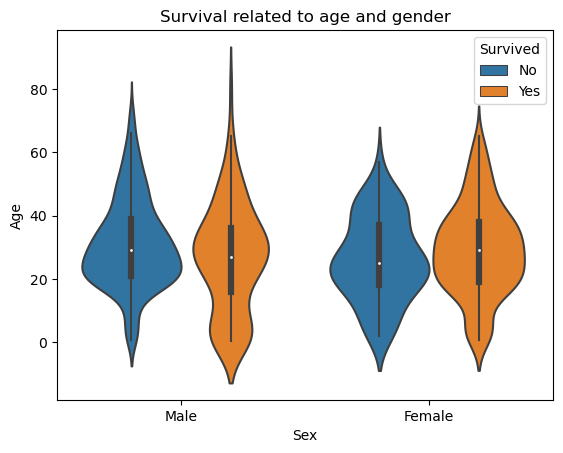

In [13]:
sns.violinplot(data=data, x="Sex", y="Age", hue="Survived").set_title('Survival related to age and gender')

7. A violin chart describing the survival rate related to age and ticket class

Text(0.5, 1.0, 'Survival related to age and ticket class')

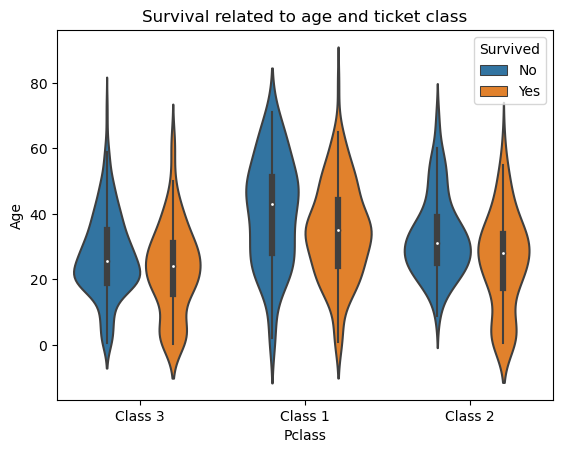

In [14]:
sns.violinplot(data=data, x="Pclass", y="Age", hue="Survived").set_title('Survival related to age and ticket class')